# CMS3504 - Week 04 Examples: Visualisation of Multivariate Data

The examples in this notebook introduce you to some of the common visualisation techniques used when exploring multivariate data.

Visualisations shown in this notebook were created by using both the Matplotlib package and pandas built-in visualisation. These will be noted in the text desription or the in-situ comments.

## Importing required packages for visualisation

The package key package for visualisation used in this exercise is:

`matplotlib`: https://matplotlib.org/

matplotlib consists of methods and classes for both low-level and high-level plotting and drawing.

pandas itself also have an number of methods for common visualisation tasks. These methods all built on top of the matplotlib package as you may see from the examples in this notebook.

In [1]:
#This is ipython magic command which specifies how a matplotlib plot will be displayed in the notebook.
%matplotlib notebook
#pandas untilites and methods are from the pandas package
import pandas as pd
import numpy as np
import random
import math

#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

## Loading dataset:

In addition to the adult dataset: https://archive.ics.uci.edu/ml/datasets/Adult.
The examples below also use the iris dataset to demonstrate the visualisation of contiuous variables.
https://archive.ics.uci.edu/ml/datasets/Iris

In [3]:
#pandas has a number helper methods for import data from files, e.g. csv, json
#Here we import data from a csv file
adult_data = pd.read_csv('./data/adult/adult_full.data')
iris_data = pd.read_csv('./data/iris/iris.data')

## Example 0: Box Plot a.k.a Whisker Plot
Box plots are commonly used to visualise the spread of a continuous variable.

pandas has a builtin method box to create a simple box plot

`box`:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html#pandas.DataFrame.plot.box

<IPython.core.display.Javascript object>


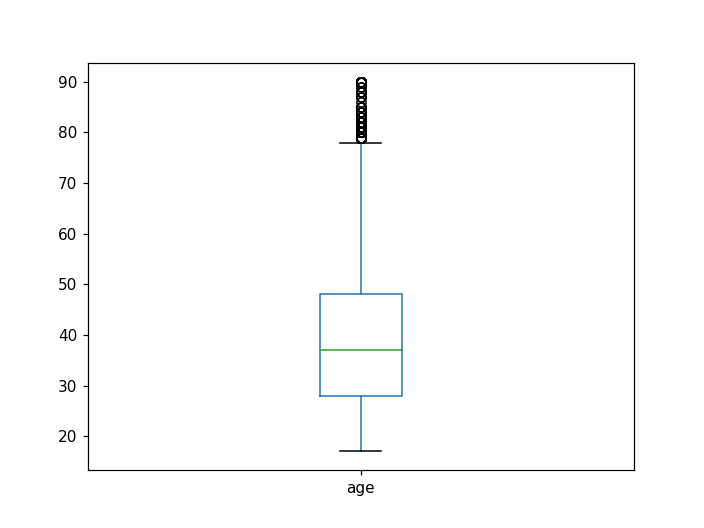

In [4]:
#create a box plot of the age attribute using box

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

adult_data.age.plot.box(ax=axis)

<IPython.core.display.Javascript object>


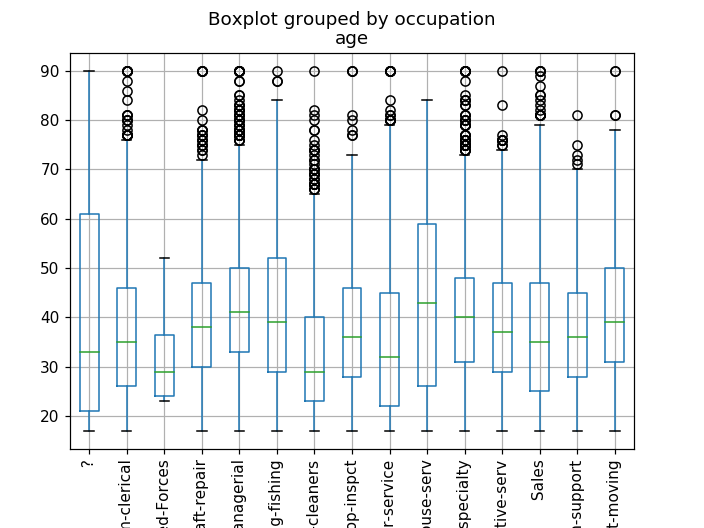

In [5]:
#We can also create multiple box plots for each category of an attribute
#E.g. age for each occupation

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

adult_data.boxplot(column='age', by='occupation', rot=90, ax = axis)

## Example 1: Cross Tabulation

pandas has a convenient function that calculates the cross tabulation of given columns.

`pandas.crosstab`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html#pandas.crosstab

In [6]:
#create a cross tabulation on sex and salary
pd.crosstab(adult_data.sex, adult_data.salary)

salary,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


In [7]:
#Margins can be used to display subtotals along rows and columns
pd.crosstab(adult_data.sex, adult_data.salary, margins=True)

salary,<=50K,>50K,All
sex,,,
Female,14423,1769,16192
Male,22732,9918,32650
All,37155,11687,48842


In [8]:
#Cross tabulation can be normalised to show approximated joint probability
pd.crosstab(adult_data.sex, adult_data.salary, normalize=True, margins=True)

salary,<=50K,>50K,All
sex,,,
Female,0.295299,0.036219,0.331518
Male,0.465419,0.203063,0.668482
All,0.760718,0.239282,1.000000


In [10]:
#Cross tabulation can be applied to more than two columns by specifying column group
#This will create a hierarchical cross tabulation based on the grouping
#Here salary and Marital-status are grouped together

pd.crosstab(adult_data.sex, [adult_data.salary, adult_data['Marital-status']], normalize=True)

salary             <=50K                                         \
Marital-status  Divorced  Married-AF-spouse  Married-civ-spouse   
sex                                                               
 Female         0.076307           0.000307            0.028029   
 Male           0.045760           0.000164            0.225748   

salary                                                                     \
Marital-status  Married-spouse-absent  Never-married  Separated   Widowed   
sex                                                                         
 Female                      0.005856       0.142480   0.018488  0.023832   
 Male                        0.005815       0.172495   0.010810  0.004627   

salary              >50K                                         \
Marital-status  Divorced  Married-AF-spouse  Married-civ-spouse   
sex                                                               
 Female         0.005610           0.000205            0.022747   
 Male           0.008128           0.000082            0.181667   

salary                                                                     
Marital-status  Married-spouse-absent  Never-married  Separated   Widowed  
sex                                                                        
 Female                      0.000369       0.005303   0.000573  0.001413  
 Male                        0.000819       0.009705   0.001454  0.001208

In [11]:
# Example of cross tabulation on non-dichotomous variables
pd.crosstab(adult_data.education, adult_data.relationship, margins=True)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
education,,,,,,,
10th,471,303,62,326,181,46,1389
11th,479,332,90,651,216,44,1812
12th,166,128,38,239,65,21,657
1st-4th,111,67,23,11,29,6,247
5th-6th,238,105,61,19,65,21,509
7th-8th,503,208,46,66,103,29,955
9th,305,160,44,108,104,35,756
Assoc-acdm,581,483,30,198,201,108,1601
Assoc-voc,883,536,38,212,274,118,2061


## Example 2: Alternative Visualisation of Cross Tabulation

It is relatively difficult to discerning the values in a large cross tabulation.
Alternative means of visualising a cross tabulation consisting of large number of values include heatmaps and 3D bar charts.

<IPython.core.display.Javascript object>


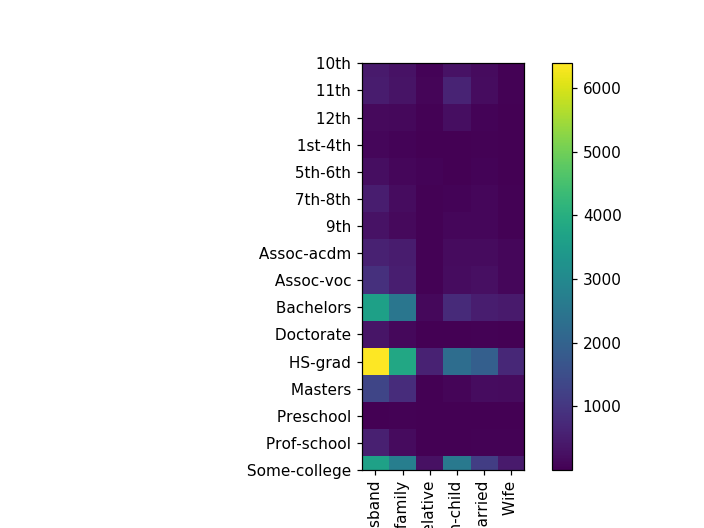

[Text(0, 0, ' 10th'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' 12th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' Bachelors'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' Some-college')]

In [12]:
#Note: This example uses matplotlib package for visualisation.

#Displaying cross tabulation as a heatmap

#the pandas crosstab method returns the results as a data frame
ctab = pd.crosstab(adult_data.education, adult_data.relationship)

#convert the data frame into a numpy array
#we will treat this array as an image
image = ctab.to_numpy()

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

#plot the image on the axis of the plot
image = axis.imshow(image)

#show the color bar
fig.colorbar(image)

#add labels and ticks to the axis for enhancement
col_labels = ctab.columns.to_list()
row_labels = ctab.index.values

axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels)

<IPython.core.display.Javascript object>


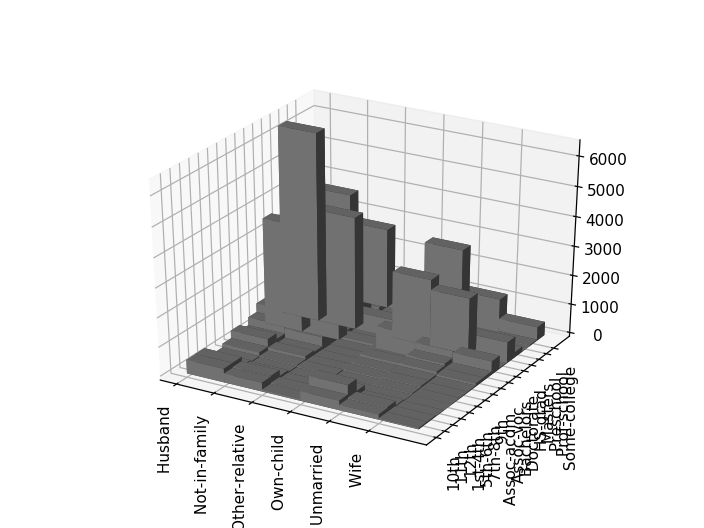

[Text(0, 0, ' 10th'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' 12th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' Bachelors'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' Some-college')]

In [13]:
#Note: This example uses matplotlib package for visualisation.

#In this example we will use a 3D bar chart to show the cross tabulation between relationship and education

#the pandas crosstab method returns the results as a data frame
ctab = pd.crosstab(adult_data.education, adult_data.relationship)

#convert the data frame into a numpy array
#we will treat this array as an image
image = ctab.to_numpy()

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
#this time projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

col_labels = ctab.columns.to_list()
row_values = ctab.index.values

#enumerate through the columns and rows of the cross tab
for x in range(len(col_labels)):
    for y in range(len(row_values)):
        #for each cell in the cross tab draw a 3D bar at a designated location
        #the height of the bar is determined by the cell value
        axis.bar3d(x,y,0, 1,1, ctab.iloc[y,x], zsort='average', color='grey')

axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels, rotation='vertical')

## Example 3: Scatter Plots

<IPython.core.display.Javascript object>


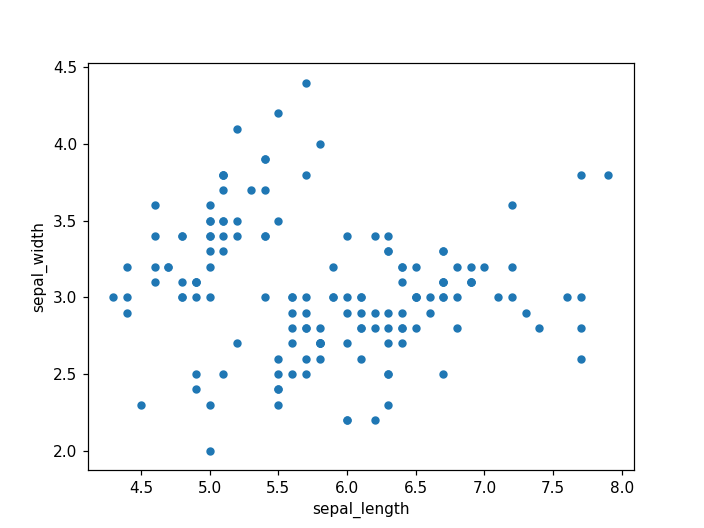

In [14]:
#pandas dataframe provides scatter method to create 2D scatter plot by specifying two columns from the dataset

#here we plot the sepal_length and 'sepal_width columns on a 2D Cartesian coordinate system
iris_data.plot.scatter(x='sepal_length',y='sepal_width')

<IPython.core.display.Javascript object>


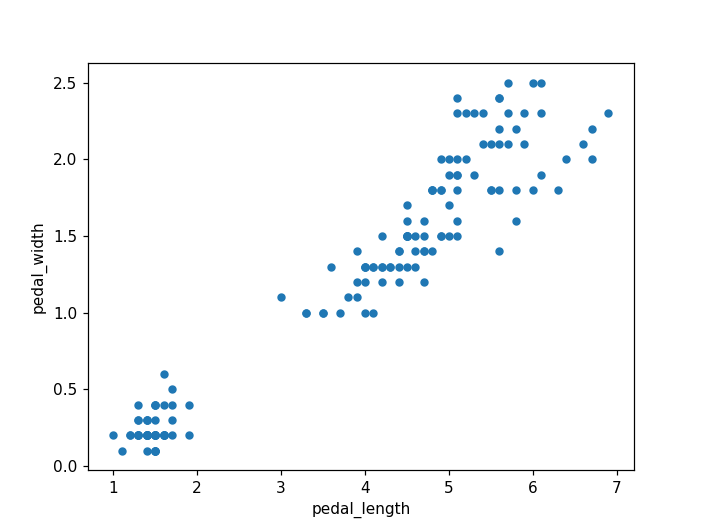

In [15]:
iris_data.plot.scatter(x='pedal_length',y='pedal_width')

<IPython.core.display.Javascript object>


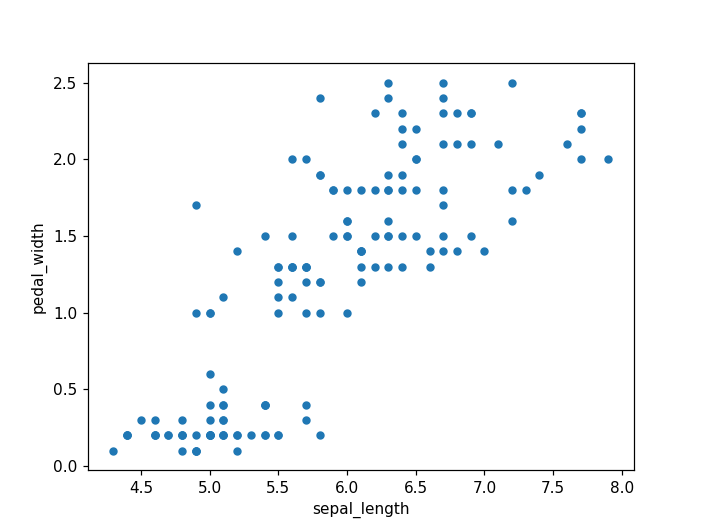

In [16]:
iris_data.plot.scatter(x='sepal_length',y='pedal_width')

<IPython.core.display.Javascript object>


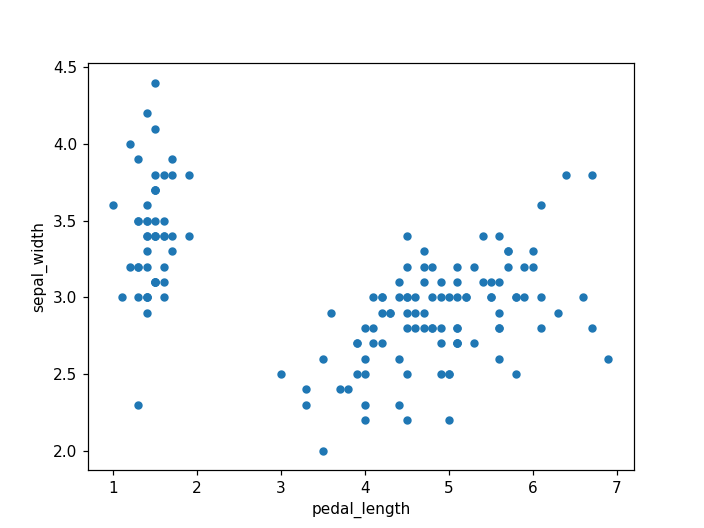

In [17]:
iris_data.plot.scatter(x='pedal_length',y='sepal_width')

## Example 4: 2D Scatter Matrix

<IPython.core.display.Javascript object>


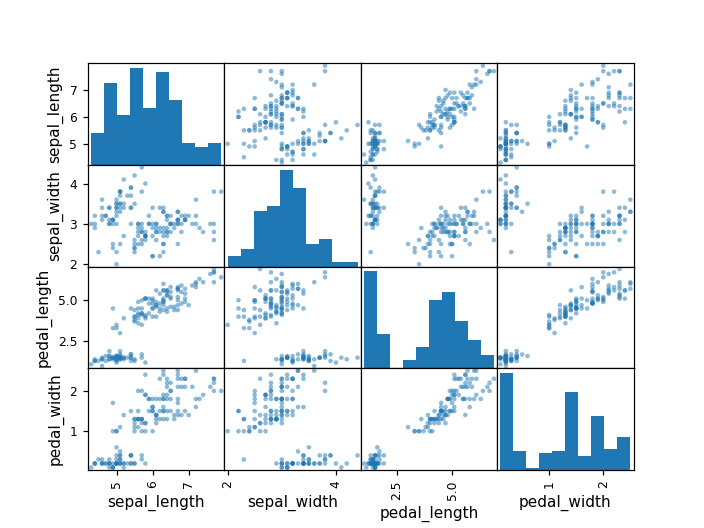

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244E38D40C8>,
      dtype=object)

In [18]:
#2D scatter plots are suitable for pair-wise visualisation of variables
#Given a dataset with N number of attributes, we may also present all permutations of 2D scatter plot in a matrix

#pandas provides scatter_matrix method for presenting all pair-wise scatter plots in matrix form
#note: the diagnoal of the matrix is a histogram since it represents a variable paired against itself
pd.plotting.scatter_matrix(iris_data)

## Example 5: 3D Scatter Plots

Since the concept of a scatter plot is to map the value of an attribute to an axis of a target coordinate system, we can also extend scatter plots into 3D.

Please note: as pandas does not provide built-in methods for 3D scatter plots. The following examples are implemented using the matplotlib package.

`Axes3D`: https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html#mpl_toolkits.mplot3d.axes3d.Axes3D

<IPython.core.display.Javascript object>


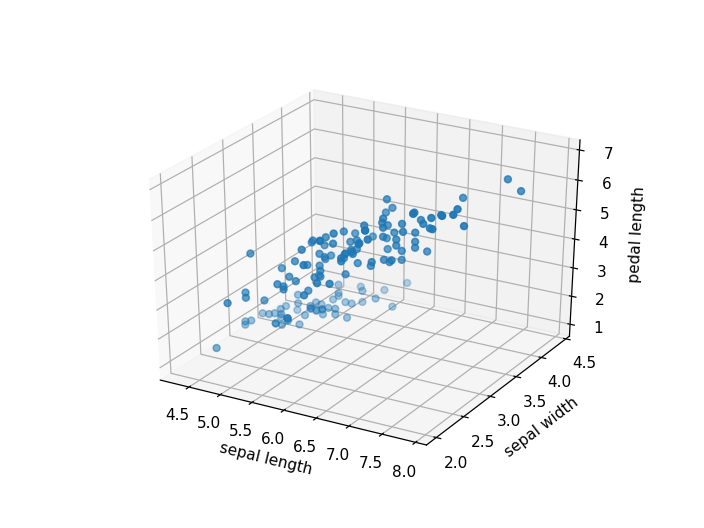

Text(0.5, 0, 'pedal length')

In [19]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

#Here we use the scatter method from matplotlib's Axes3D class
axis.scatter(iris_data.iloc[:,0], iris_data.iloc[:,1], iris_data.iloc[:,2])
axis.set_xlabel('sepal length')
axis.set_ylabel('sepal width')
axis.set_zlabel('pedal length')

<IPython.core.display.Javascript object>


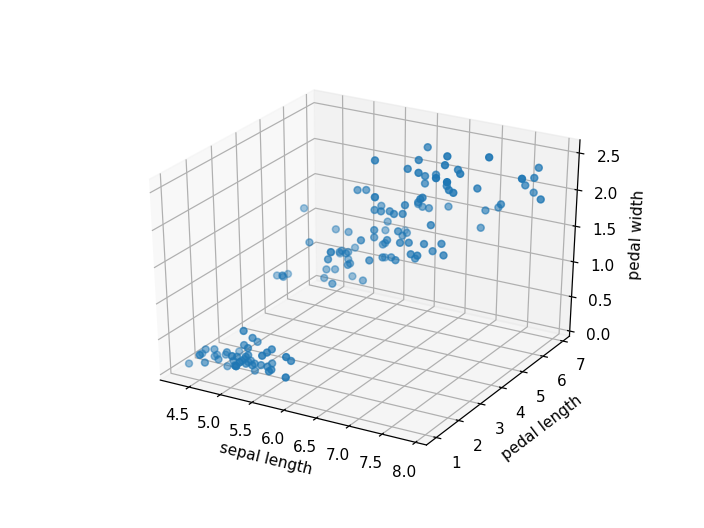

Text(0.5, 0, 'pedal width')

In [20]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

axis.scatter(iris_data.iloc[:,0], iris_data.iloc[:,2], iris_data.iloc[:,3])
axis.set_xlabel('sepal length')
axis.set_ylabel('pedal length')
axis.set_zlabel('pedal width')

## Example 6: Visualising Contiuous Variables against Discrete Variables

Scatter plot is primarily designed for contiuous variables where intervals are quantitatively meaningful.
When visualising discrete variables, e.g. nominal or ordinal, it is not useful to map its value onto an axis.
However, as these variable usually indicates a category, we can map their value to other discernbile quantities such as colours and shapes.

<IPython.core.display.Javascript object>


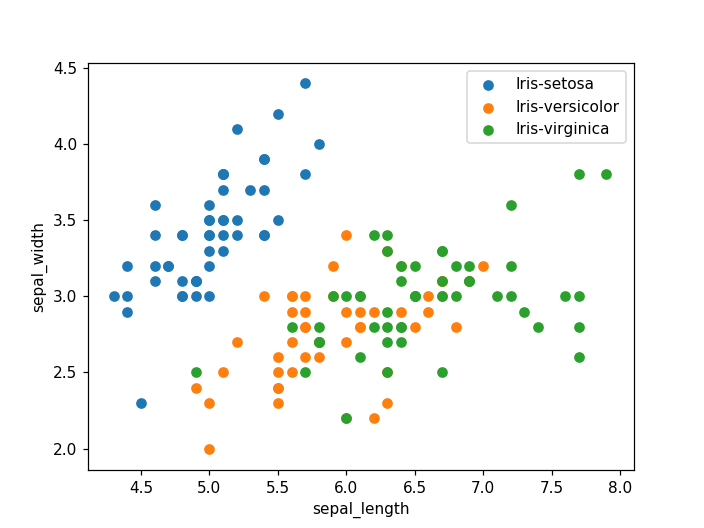

In [21]:
#Here we create a scatter plot using sepal width and height.
#The different species are colour coded 

fig = plt.figure()
axis = fig.add_subplot(111)

#Group the iris data by its type column
groups = iris_data.groupby(by='type')

#enumerate each group
for name, group in groups:
    #for each group create a 2D scatter plot on the axis, the colour will be selected based on label
    axis.scatter(group.sepal_length, group.sepal_width, label=name)

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')

axis.legend()
plt.show()

The example below also use different shapes to distinguish the values of a discerete variables.
For all builtin shape marker types please c.f https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle

<IPython.core.display.Javascript object>


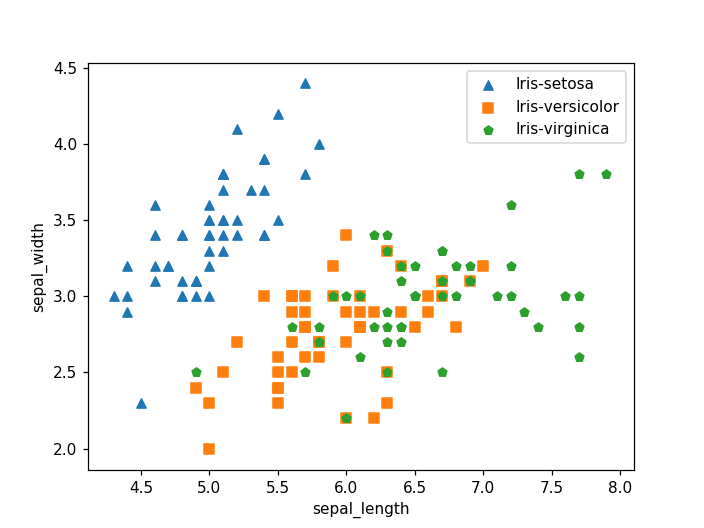

In [22]:
#Here we create a scatter plot using sepal width and height.
#The different species are differentiated by shapes and colours

fig = plt.figure()
axis = fig.add_subplot(111)

#Group the iris data by its type column
groups = iris_data.groupby(by='type')

#create a shape dictionary for translating type name to a marker shape
#note, we can use zip method to create a dictionary from two array/list like structures
shapes_dict = dict(zip(groups.indices.keys(),['^','s','p']))

#enumerate each group
for name, group in groups:
    #for each group create a 2D scatter plot on the axis, the colour will be selected based on label
    axis.scatter(group.sepal_length, group.sepal_width, marker=shapes_dict[name], label=name)

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')

axis.legend()
plt.show()

<IPython.core.display.Javascript object>


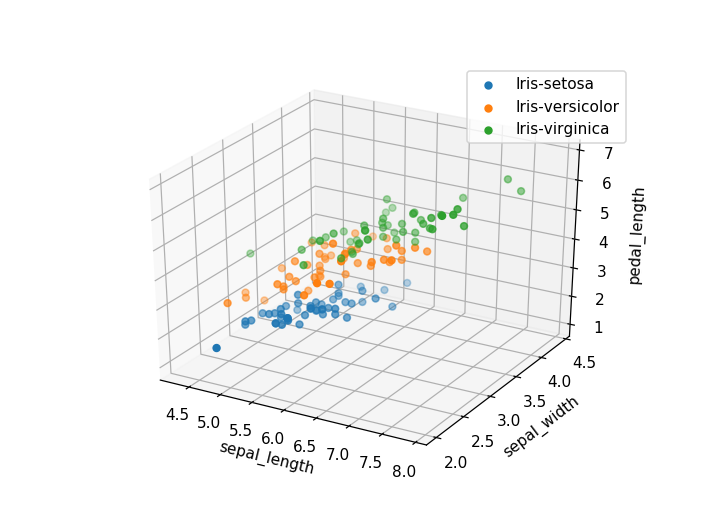

In [23]:
#Naturally, the above method can be applied to 3D scatter plot

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = iris_data.groupby(by='type')

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')
axis.set_zlabel('pedal_length')

for name, group in groups:
    axis.scatter(group.sepal_length, group.sepal_width, group.pedal_length, label=name)

axis.legend()
plt.show()

<IPython.core.display.Javascript object>


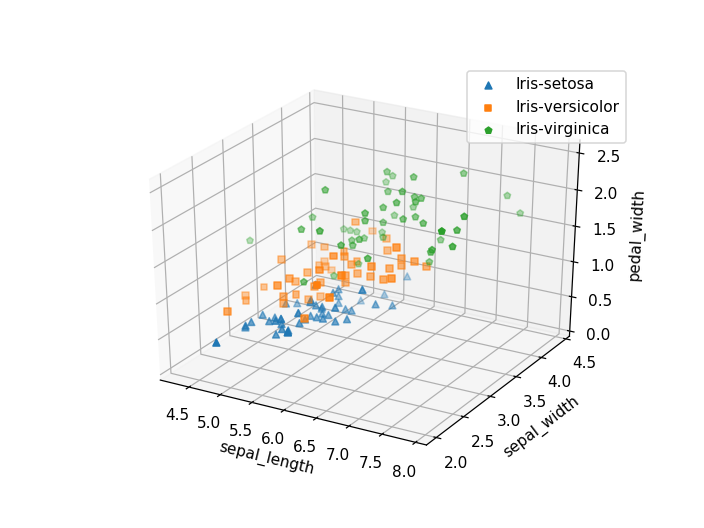

In [24]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = iris_data.groupby(by='type')

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')
axis.set_zlabel('pedal_width')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p']))

for name, group in groups:
    axis.scatter(group.sepal_length, group.sepal_width, group.pedal_width, marker=shapes_dict[name],label = name)
axis.legend()
plt.show()

## Example 7: Breaking the 3D limit

Cartesian coordinate systems have its limitation in representing continuous data of higher dimension, e.g. dimension greater than 3.

In the following examples, we will look at some useful techniques for visualising more than 3 continuous variables.

<IPython.core.display.Javascript object>


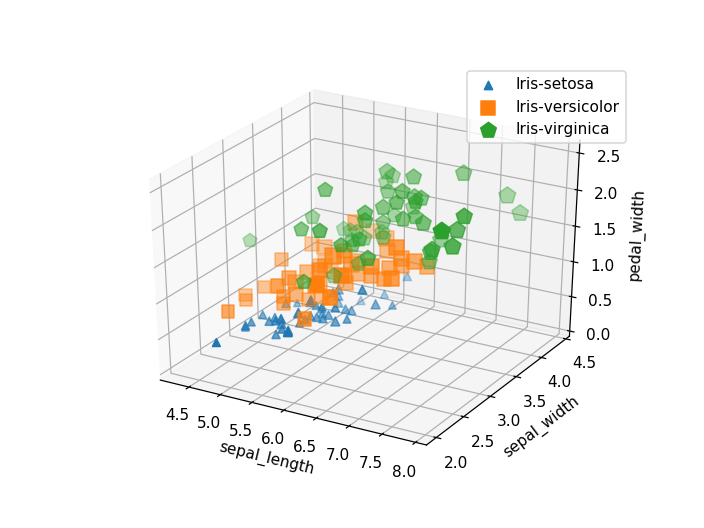

In [25]:
#In this example, add the fourth contiuous variable pedal_length to the visualisation
#We will do so by representing the value of pedal_length as the size of each marker.

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = iris_data.groupby(by='type')

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')
axis.set_zlabel('pedal_width')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p']))

for name, group in groups:
    #The attribute pedal_length is used to scale the marker size for each point
    axis.scatter(group.sepal_length, group.sepal_width, group.pedal_width, s=group.pedal_length*20, marker=shapes_dict[name],label = name)

axis.legend()
plt.show()

A more popular means of visualising high dimensional continuous data is parallel coordinates.
pandas has a builtin method
`parallel_coordinates` for creating parallel coordinates plot. cf.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html#pandas.plotting.parallel_coordinates

<IPython.core.display.Javascript object>


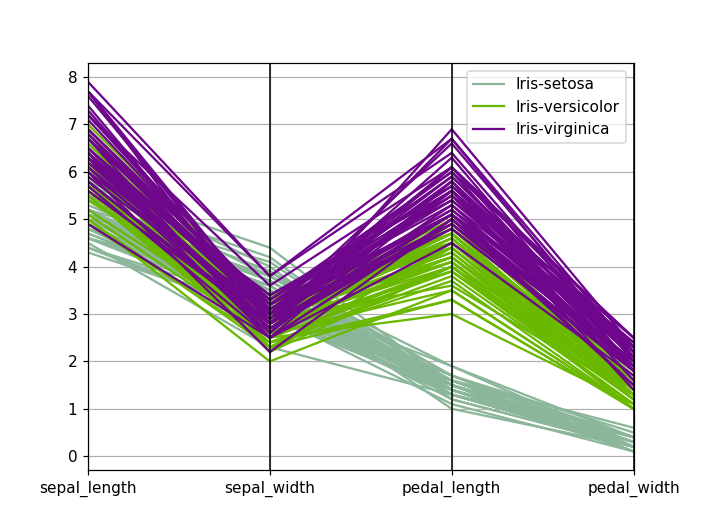

In [26]:
#In this example, you will also see how pandas is actually built on top of the matplotlib package

#create a figure using matplotlib
fig = plt.figure()

#create an axis by adding a plot to the figure
axis = fig.add_subplot(111)

#use the builtin method parallel_coordinates to create a parallel coorindates plot
#the class_column should refer to a column with discrete values
#the ax property specify the axis in which the plot will appear
pd.plotting.parallel_coordinates(iris_data, class_column='type', ax=axis)

plt.show()

The final example is a polar form of parallel coordinates referred to as __radar chart__ or __spider plot__.

<IPython.core.display.Javascript object>


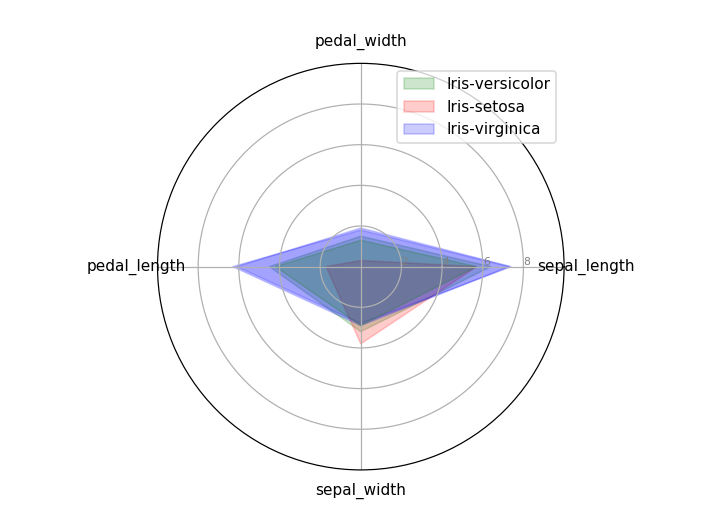

(6.4, 3.2, 4.5, 1.5)
(5.7, 3.8, 1.7, 0.3)
(7.3, 2.9, 6.3, 1.8)
(7.4, 2.8, 6.1, 1.9)
(5.7, 2.9, 4.2, 1.3)


In [27]:
#Get the number of attributes in the data
num_attributes = len(iris_data.columns.values)

#Based on the number of attributes, we will need to work out the number axis required and the delta angle 
#between the axes when arranging them around a circle
thetas = [n/float(num_attributes-1)*2.0*math.pi for n in range(num_attributes-1)]

#create a figure
fig = plt.figure()

#create an axis from a plot, note: we will use polar coordinate here 
axis = fig.add_subplot(111, polar=True)

# If you want the first axis to be on top:
axis.set_theta_direction(-1)

#use the column names to label each polar axis
plt.xticks(thetas, iris_data.columns.values)

axis.set_rlabel_position(0)
plt.yticks([2,4,6,8], ["2","4","6","8"], color="grey", size=7)
plt.ylim(0,10)


#let us randomly draw 5 irises from the data and plot them onto the radar chart
sample_irises = iris_data.sample(5)

colour_dict = dict(zip(iris_data.type.unique(),['r','g','b']))

#Plot the data
for sample in sample_irises.itertuples():
    print(sample[1:5])
    axis.fill(thetas, sample[1:5], color=colour_dict[sample[5]], alpha=0.2, label=sample[5])

handles, labels = plt.gca().get_legend_handles_labels();
unique_label = dict(zip(labels, handles))
plt.legend(unique_label.values(), unique_label.keys(), loc='upper right')

plt.show()